In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import smtplib
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
from email.message import EmailMessage
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
df = pd.read_excel("PositiveCase.xlsx")

In [3]:
df

,Date,New_Positive
0,2020-03-02,2
1,2020-03-03,0
2,2020-03-04,0
3,2020-03-05,0
4,2020-03-06,2
...,...,...
754,2022-03-27,3077
755,2022-03-28,2798
756,2022-03-29,3895
757,2022-03-30,3840


In [4]:
# df.index = pd.to_datetime(df['Date'])
# df.drop(columns='Date',inplace=True)
# df.head()

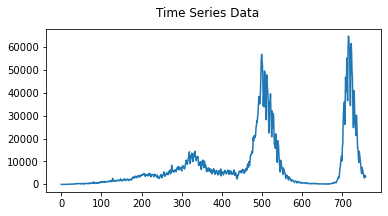

In [5]:
# Line plots of time series
fig, ax = plt.subplots(figsize=(6,3))
fig.suptitle('Time Series Data')
df.New_Positive.plot(ax=ax)
plt.show()

ADF TEST

In [6]:
from statsmodels.tsa.stattools import kpss
# result = adfuller(df.New_Positive)
def adfuller(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'ADF Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value > 0.05 else ""}stationary')
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# print('Number of lags considered for the test: %f' % result[2])
# print('The critical value cutoffs: %f' % result[3])
adfuller(df.New_Positive)

ADF Statistic: 0.7966155841644493
p-value: 0.01
num lags: 17
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Bryan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


KPSS TEST FOR STATIONARITY
machinelearningplus.com/time-series/kpss-test-for-stationarity/

In [7]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df.New_Positive, regression='ct')

KPSS Statistic: 0.09038646726809786
p-value: 0.1
num lags: 17
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


C:\Users\Bryan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# ACF dan PACF

C:\Users\Bryan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


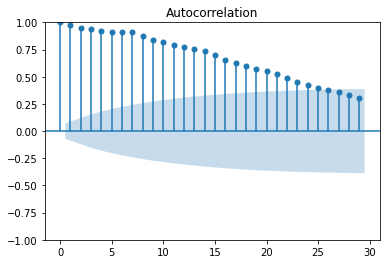

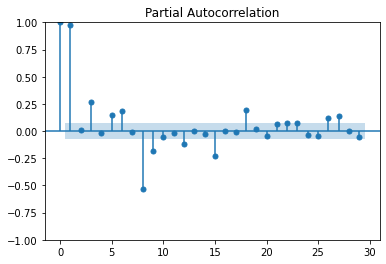

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig1=plot_acf(df['New_Positive'].dropna())
fig2=plot_pacf(df['New_Positive'].dropna())

# Train and Test

In [9]:
# train=df.New_Positive.iloc[:-152]
# test=df.New_Positive.iloc[-152:]
# print(train.shape,test.shape)

(607,) (152,)


In [22]:
train=df.iloc[:-152]
test=df.iloc[-152:]
print(train.shape,test.shape)

(607, 2) (152, 2)


# Modeling

In [11]:
# import numpy as np, pandas as pd
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import matplotlib.pyplot as plt
# plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# # Original Series
# fig, axes = plt.subplots(3, 2, sharex=True)
# axes[0, 0].plot(df.New_Positive); axes[0, 0].set_title('Original Series')
# plot_acf(df.New_Positive, ax=axes[0, 1])

# # 1st Differencing
# axes[1, 0].plot(df.New_Positive.diff()); axes[1, 0].set_title('1st Order Differencing')
# plot_acf(df.New_Positive.diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(df.New_Positive.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(df.New_Positive.diff().diff().dropna(), ax=axes[2, 1])

# plt.show()

# ARIMA

In [23]:
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(train.New_Positive, order=(1,0,0))
model_fit1 = model1.fit()
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:           New_Positive   No. Observations:                  607
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -5474.640
Date:                Thu, 09 Jun 2022   AIC                          10955.281
Time:                        08:46:45   BIC                          10968.506
Sample:                             0   HQIC                         10960.427
                                - 607                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6991.4793   6650.151      1.051      0.293   -6042.578       2e+04
ar.L1          0.9778      0.006    159.847      0.000       0.966       0.990
sigma2      3.977e+06   7.11e+04     55.955      0.0

In [28]:
# fc, se, conf = model_fit1.forecast(152, alpha=0.05)  # 95% conf
# # Make as pandas series
# fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# # Plot
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train, label='training')
# plt.plot(test, label='actual')
# plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()

In [15]:
# # Accuracy metrics
# def forecast_accuracy(forecast, actual):
#     mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
#     me = np.mean(forecast - actual)             # ME
#     mae = np.mean(np.abs(forecast - actual))    # MAE
#     mpe = np.mean((forecast - actual)/actual)   # MPE
#     rmse = np.mean((forecast - actual)**2)**.5  # RMSE
#     corr = np.corrcoef(forecast, actual)[0,1]   # corr
#     mins = np.amin(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     maxs = np.amax(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     minmax = 1 - np.mean(mins/maxs)             # minmax
#     acf1 = acf(fc-test)[1]                      # ACF1
#     return({'mape':mape, 'me':me, 'mae': mae, 
#             'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
#             'corr':corr, 'minmax':minmax})

# forecast_accuracy(model_fit1, test.values)

In [26]:
forecast = model1.predict(n_periods=len(test), exogenous=None,order=(1,0,0))

TypeError: predict() missing 1 required positional argument: 'params'

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

In [ ]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

# The Shapiro-Wilk test is a test of normality

In [ ]:
from scipy.stats import shapiro

In [ ]:
residuals = pd.DataFrame(model_fit1.resid)

In [ ]:
shapiro(residuals)

In [ ]:
kstest(residuals, 'norm')

# The Ljung-Box test is a statistical test that checks if autocorrelation exists in a time series.

It uses the following hypotheses:

H0: The residuals are independently distributed.

HA: The residuals are not independently distributed; they exhibit serial correlation.

In [ ]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(residuals, lags=[1])

the p-value of the test be greater than 0.05 because this means the residuals for  time series model are independent

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
model_fit1.plot_predict(dynamic=False)
plt.show()

In [ ]:
start = len(train)
end = len(train)+len(test)-1
forecast = model1.predict(start=start,end=end,dynamic=True,exog=None)
test["Forecast_ARIMAX"] = forecast
test[["New_Positive", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(df.New_Positive, order=(3,1,4))
model_fit1 = model1.fit(train.New_Positive)
print(model_fit1.summary())

In [ ]:
import statsmodels.api as sm
from numpy.random import seed
from numpy.random import poisson
from scipy.stats import kstest

#set seed (e.g. make this example reproducible)
# seed(0)
# sm.stats.acorr_ljungbox(model1, lags=None)
kstest(train, 'norm')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model2 = ARIMA(df.New_Positive, order=(1,1,2))
model_fit2 = model.fit()
print(model_fit2.summary())

In [ ]:
model = ARIMA(df.New_Positive, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train=df.New_Positive.iloc[:-152]
test=df.New_Positive.iloc[-152:]

In [ ]:
model = ARIMA(train, order=(1,0,5))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(152, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()